In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.append('..')
from scripts import census_parser as cp
%matplotlib inline

plot_defaults = dict(mpl.rcParams)

In [2]:
BASE_DIR = '../data'
l_tail = 'rawXtractor/census-out.txt'
h_tail = 'rawXtractor/n15_search/census-out.txt'

In [3]:
def make_pca_df(samples, group = '', clean = False, norm = True):
    dfs = []
    for sample in samples:
        light_file = os.path.join(BASE_DIR, sample, l_tail)
        heavy_file = os.path.join(BASE_DIR, sample, h_tail)
        dfs.append(list(cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = norm))) 
    if group:
        return cp.prep_for_pca(dfs, name = group, clean = clean)
    return cp.prep_for_pca(dfs, clean = clean)

---

## Plot PCA for different Sample Combinations

### Fist All unenriched samples collected so far

In [4]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121', '20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111', '20160331-UnerFecal-Lys-N14N15-Pool']

In [5]:
df = make_pca_df(samples, clean = True)

Starting peptides:  4916
Peptides after Cleaning:  105


explained variance ratios: [ 0.2690696   0.18583912]


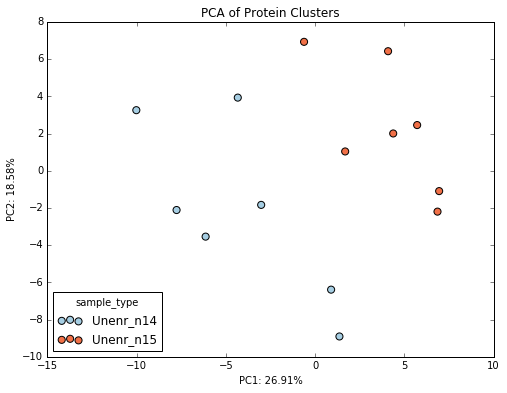

In [6]:
cp.plot_pca(df, loc = 3)

explained variance ratios: [ 0.2690696   0.18583912]


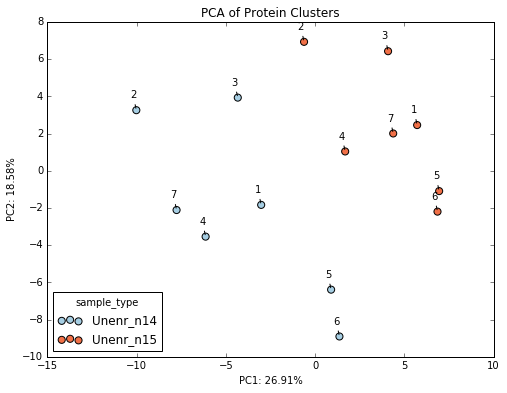

In [7]:
cp.plot_pca(df, labels = True, loc = 3)

### Just the Peptides from samples collected on 11/11/2015

In [8]:
samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
df = make_pca_df(samples, clean = True)

Starting peptides:  2841
Peptides after Cleaning:  504


explained variance ratios: [ 0.43845287  0.30613245]


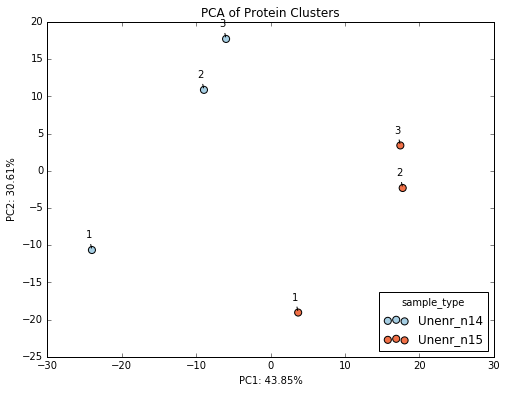

In [9]:
cp.plot_pca(df, labels = True, loc = 4)

### Just the smaples collected on 11/21

In [10]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
df = make_pca_df(samples, clean = True)

Starting peptides:  2573
Peptides after Cleaning:  416


explained variance ratios: [ 0.38555603  0.32946981]


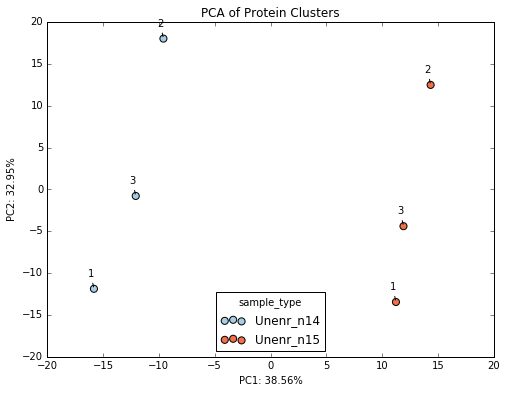

In [11]:
cp.plot_pca(df, loc = 8, labels = True)

## PCA Plot for the Enriched Samples Only

In [12]:
samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [13]:
df = make_pca_df(samples, clean = True, group = 'BioGlyCMK')

Starting peptides:  3243
Peptides after Cleaning:  505


explained variance ratios: [ 0.44988901  0.28466108]


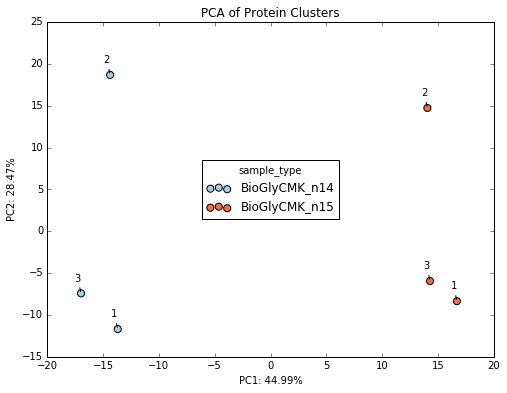

In [14]:
cp.plot_pca(df, loc = 10, labels = True)

## Looking at a PCA with both the Unenriched and Enriched samples  - 

### Start with just 11/11 collection for Unenriched Dataset

In [15]:
unen_samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [16]:
dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  4919
Peptides after Cleaning:  178


explained variance ratios: [ 0.31828122  0.24605222]


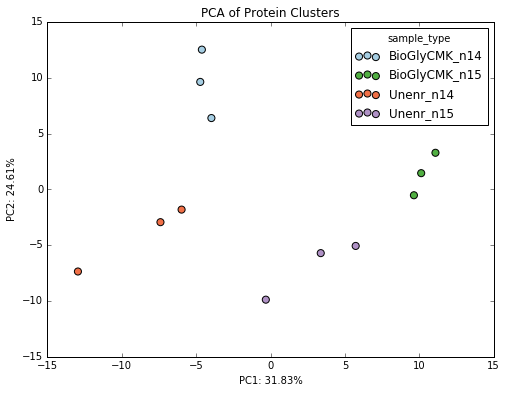

In [17]:
cp.plot_pca(df)

explained variance ratios: [ 0.31828122  0.24605222]


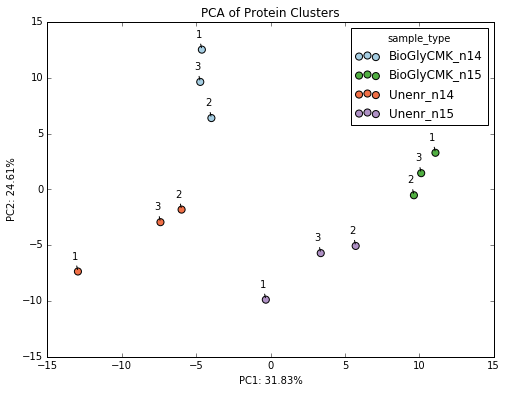

In [18]:
cp.plot_pca(df, loc = 1, labels = True)

Looks like there's still some good separation between n14 and n15, but there is also a separation between the probe enriched samples and the unenriched samples.  There is still a really strong mirror between N14 and N15 samples of the same MS run.

### Looking at Unenriched samples collected on 11/21/15

In [19]:
unen_samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  5129
Peptides after Cleaning:  72


explained variance ratios: [ 0.32534919  0.29646903]


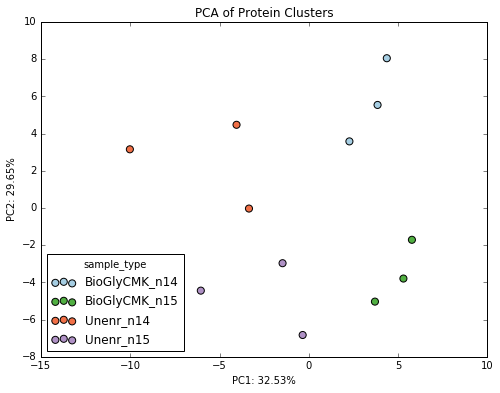

In [20]:
cp.plot_pca(df, loc = 3)

explained variance ratios: [ 0.32534919  0.29646903]


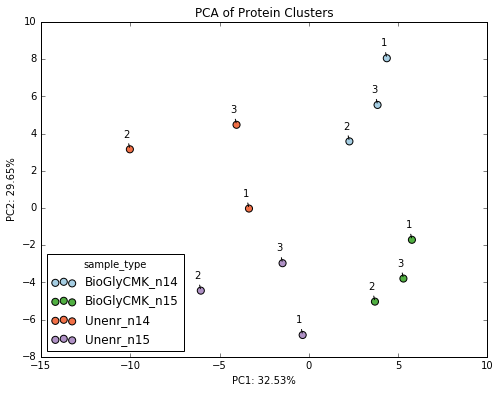

In [21]:
cp.plot_pca(df, loc=3, labels = True)

## Let's look at how the ditrubutions vary with normlization

In [22]:
import seaborn as sns

### Log transformed, but NOT Standard Normalized

Starting peptides:  2448
Peptides after Cleaning:  2409


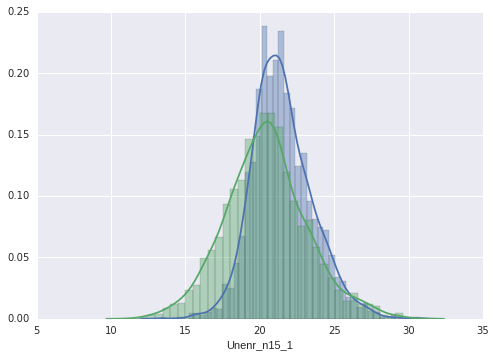

In [23]:
light_file = os.path.join(BASE_DIR, samples[0], l_tail)
heavy_file = os.path.join(BASE_DIR, samples[0], h_tail)

dfs = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = False)
df_unnorm = cp.prep_for_pca([dfs])
sns.distplot(df_unnorm.T.Unenr_n14_1)
sns.distplot(df_unnorm.T.Unenr_n15_1)

### Normalize on Import

Starting peptides:  2448
Peptides after Cleaning:  2409


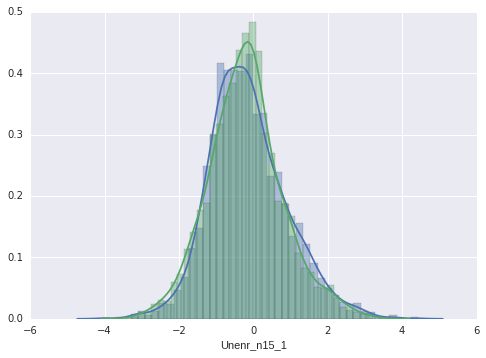

In [24]:
df = cp.parse_l_h_together(light_file, heavy_file, only_s = True, norm = True)
df = cp.prep_for_pca([df])

sns.distplot(df.T.Unenr_n14_1)
sns.distplot(df.T.Unenr_n15_1)

### Normalize right before plotting

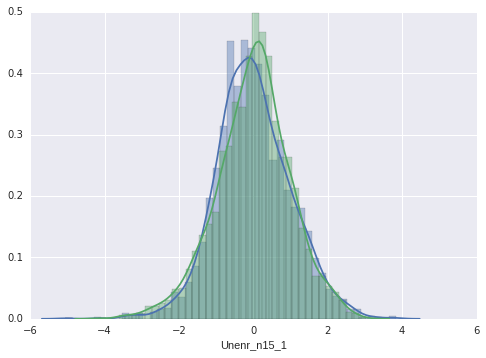

In [25]:
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n14_1))
sns.distplot(cp.norm_integrations(df_unnorm.T.Unenr_n15_1))

## Lets try normalzing right before plotting the PCA and see how it differes

In [26]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121', '20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111', '20160331-UnerFecal-Lys-N14N15-Pool']
df = make_pca_df(samples, clean = False, norm = False)

In [27]:
df.head()

sequence    -.ADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPK.D -.AHVDCPGHADYVK.N  \
cs                                               3                 2   
Unenr_n14_1                              26.443042         19.992918   
Unenr_n15_1                              23.551083         21.245591   
Unenr_n14_2                                    NaN         17.096406   
Unenr_n15_2                                    NaN         18.508774   
Unenr_n14_3                                    NaN               NaN   

sequence    -.AIHDTVHEMAR.D -.DVVM(15.9949)TQTPLSLPVSLGDQASISCR.S  \
cs                        2                                     2   
Unenr_n14_1             NaN                             21.679667   
Unenr_n15_1             NaN                             18.040696   
Unenr_n14_2             NaN                                   NaN   
Unenr_n15_2             NaN                                   NaN   
Unenr_n14_3             NaN                                   NaN   

sequence    -.DVVMTQTPLSLPVSLGDQASISCR.S     -.EGYPEIGLYWEK.A  \
cs                                     2   3                2   
Unenr_n14_1                    23.589546 NaN              NaN   
Unenr_n15_1                    17.047262 NaN              NaN   
Unenr_n14_2                          NaN NaN        19.478926   
Unenr_n15_2                          NaN NaN        19.613408   
Unenr_n14_3                          NaN NaN        19.027056   

sequence    -.EHIDPALGILPFQALK.I -.FGAPLITNDGVTIAK.D -.GITINTSHVEYDTPTR.H  \
cs                             2                   2                    2   
Unenr_n14_1                  NaN           20.099309                  NaN   
Unenr_n15_1                  NaN           21.031386                  NaN   
Unenr_n14_2                  NaN                 NaN                  NaN   
Unenr_n15_2                  NaN                 NaN                  NaN   
Unenr_n14_3                  NaN                 NaN                  NaN   

sequence           ...         R.YVVISHTAGSFCNSPDSCEQQAR.N  \
cs                 ...                                   3   
Unenr_n14_1        ...                                 NaN   
Unenr_n15_1        ...                                 NaN   
Unenr_n14_2        ...                                 NaN   
Unenr_n15_2        ...                                 NaN   
Unenr_n14_3        ...                           22.407234   

sequence    R.YWPNIPTHDPNGNPTLFSYIDAFENGGR.Y  \
cs                                         3   
Unenr_n14_1                              NaN   
Unenr_n15_1                              NaN   
Unenr_n14_2                              NaN   
Unenr_n15_2                              NaN   
Unenr_n14_3                              NaN   

sequence    R.YYAM(15.9949)HHPFTAPNPEDVDKLDTDTGAVR.A R.YYIVGLQVR.Y  \
cs                                                 3             2   
Unenr_n14_1                                      NaN     21.848477   
Unenr_n15_1                                      NaN     21.273481   
Unenr_n14_2                                      NaN           NaN   
Unenr_n15_2                                      NaN           NaN   
Unenr_n14_3                                19.346042     25.983852   

sequence    R.YYKDEPFVHVFPASKPVQTK.W R.YYKDEPFVHVYPASK.A R.YYKDEPFVHVYPASK.P  \
cs                                 3                   2                   2   
Unenr_n14_1                      NaN           19.021660           19.021660   
Unenr_n15_1                      NaN           20.708043           20.708043   
Unenr_n14_2                21.738421                 NaN                 NaN   
Unenr_n15_2                20.849220                 NaN                 NaN   
Unenr_n14_3                21.176321                 NaN                 NaN   

sequence    R.YYSLPDLANPFR.T R.YYVLGATFYPGPECER.L R.YYVPYGGPRPESYR.K  
cs                         2                    2                  2  
Unenr_n14_1        26.230919                  NaN

In [28]:
df = df.apply(cp.norm_integrations, axis = 1)

### Making sure the Apply fucntion worked across the correct axis.....

In [29]:
df.head()

sequence    -.ADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPK.D -.AHVDCPGHADYVK.N  \
cs                                               3                 2   
Unenr_n14_1                               2.081565         -0.745936   
Unenr_n15_1                               1.014881          0.211342   
Unenr_n14_2                                    NaN         -1.974126   
Unenr_n15_2                                    NaN         -0.892896   
Unenr_n14_3                                    NaN               NaN   

sequence    -.AIHDTVHEMAR.D -.DVVM(15.9949)TQTPLSLPVSLGDQASISCR.S  \
cs                        2                                     2   
Unenr_n14_1             NaN                              0.073113   
Unenr_n15_1             NaN                             -1.064052   
Unenr_n14_2             NaN                                   NaN   
Unenr_n15_2             NaN                                   NaN   
Unenr_n14_3             NaN                                   NaN   

sequence    -.DVVMTQTPLSLPVSLGDQASISCR.S     -.EGYPEIGLYWEK.A  \
cs                                     2   3                2   
Unenr_n14_1                     0.926868 NaN              NaN   
Unenr_n15_1                    -1.505828 NaN              NaN   
Unenr_n14_2                          NaN NaN        -0.819682   
Unenr_n15_2                          NaN NaN        -0.446513   
Unenr_n14_3                          NaN NaN        -1.084373   

sequence    -.EHIDPALGILPFQALK.I -.FGAPLITNDGVTIAK.D -.GITINTSHVEYDTPTR.H  \
cs                             2                   2                    2   
Unenr_n14_1                  NaN           -0.692267                  NaN   
Unenr_n15_1                  NaN            0.132304                  NaN   
Unenr_n14_2                  NaN                 NaN                  NaN   
Unenr_n15_2                  NaN                 NaN                  NaN   
Unenr_n14_3                  NaN                 NaN                  NaN   

sequence           ...         R.YVVISHTAGSFCNSPDSCEQQAR.N  \
cs                 ...                                   3   
Unenr_n14_1        ...                                 NaN   
Unenr_n15_1        ...                                 NaN   
Unenr_n14_2        ...                                 NaN   
Unenr_n15_2        ...                                 NaN   
Unenr_n14_3        ...                            0.362135   

sequence    R.YWPNIPTHDPNGNPTLFSYIDAFENGGR.Y  \
cs                                         3   
Unenr_n14_1                              NaN   
Unenr_n15_1                              NaN   
Unenr_n14_2                              NaN   
Unenr_n15_2                              NaN   
Unenr_n14_3                              NaN   

sequence    R.YYAM(15.9949)HHPFTAPNPEDVDKLDTDTGAVR.A R.YYIVGLQVR.Y  \
cs                                                 3             2   
Unenr_n14_1                                      NaN      0.151547   
Unenr_n15_1                                      NaN      0.221574   
Unenr_n14_2                                      NaN           NaN   
Unenr_n15_2                                      NaN           NaN   
Unenr_n14_3                                -0.937301      1.672147   

sequence    R.YYKDEPFVHVFPASKPVQTK.W R.YYKDEPFVHVYPASK.A R.YYKDEPFVHVYPASK.P  \
cs                                 3                   2                   2   
Unenr_n14_1                      NaN           -1.249517           -1.249517   
Unenr_n15_1                      NaN            0.011458            0.011458   
Unenr_n14_2                 0.151447                 NaN                 NaN   
Unenr_n15_2                 0.024006                 NaN                 NaN   
Unenr_n14_3                -0.137663                 NaN                 NaN   

sequence    R.YYSLPDLANPFR.T R.YYVLGATFYPGPECER.L R.YYVPYGGPRPESYR.K  
cs                         2                    2                  2  
Unenr_n14_1         2.000120                  NaN

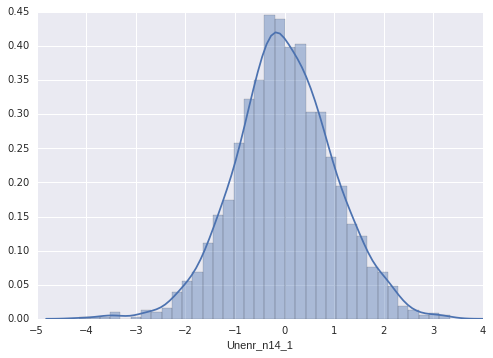

In [30]:
sns.distplot(df.T.Unenr_n14_1.dropna())

Starting peptides:  4916
Peptides after Cleaning:  105
explained variance ratios: [ 0.27887696  0.19699215]


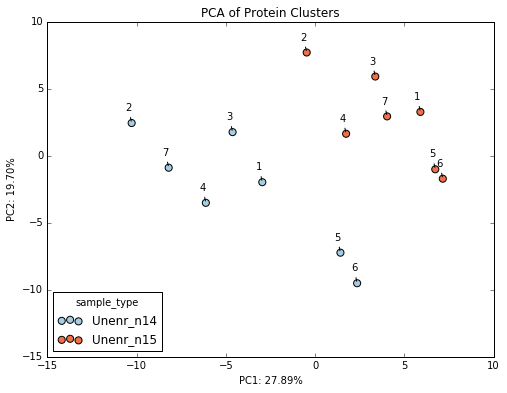

In [31]:
mpl.rcParams.update(plot_defaults) ## Reset Plotting to defaults
cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 3)

### And compare to the early normalization version

Starting peptides:  4916
Peptides after Cleaning:  105
explained variance ratios: [ 0.2690696   0.18583912]


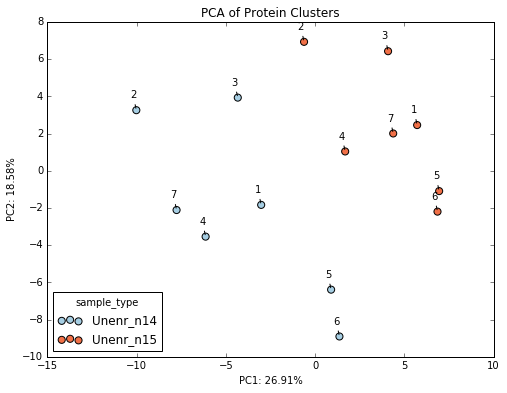

In [32]:
cp.plot_pca(make_pca_df(samples, clean = True, norm = True), labels = True, loc = 3)


Looks A very sall amount different.....

In [33]:
unen_samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']
dfa = make_pca_df(unen_samples, norm = False)
dfb = make_pca_df(enr_samples, norm = False, group = 'BioGlyCMK')
df = pd.concat([dfa, dfb])

In [34]:
df = df.apply(cp.norm_integrations, axis = 1)

Starting peptides:  4919
Peptides after Cleaning:  178
explained variance ratios: [ 0.31284625  0.24159299]


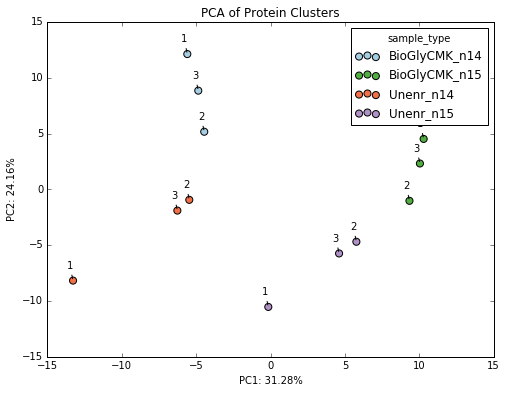

In [35]:
cp.plot_pca(cp.clean_pca_df(df), labels = True)

In [36]:
unen_samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']
dfa = make_pca_df(unen_samples, norm = False)
dfb = make_pca_df(enr_samples, norm = False, group = 'BioGlyCMK')
df = pd.concat([dfa, dfb])

In [37]:
df = df.apply(cp.norm_integrations, axis = 1)

Starting peptides:  5129
Peptides after Cleaning:  72
explained variance ratios: [ 0.33209199  0.3104938 ]


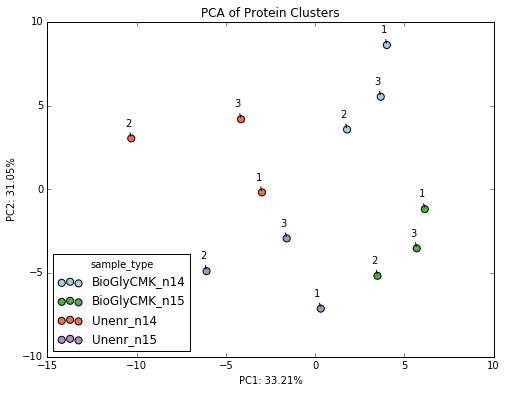

In [38]:
cp.plot_pca(cp.clean_pca_df(df), labels = True, loc = 3)